**Task#1:Car Price Prediction**

**Importing Libraries**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#For these are enough later on we will be importing more libraries according to our need

**Loading Dataset**

In [32]:
train=pd.read_csv('/train.csv')
test=pd.read_csv('/test.csv')
#Concatenating both data sets so we dont have to do preprocessing seperatly
train=pd.concat([train,test],axis=0)

**Lets see how our data Looks**

In [33]:
train.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                27482 non-null  int64  
 1   Price             19237 non-null  float64
 2   Levy              27482 non-null  object 
 3   Manufacturer      27482 non-null  object 
 4   Model             27482 non-null  object 
 5   Prod. year        27482 non-null  int64  
 6   Category          27482 non-null  object 
 7   Leather interior  27482 non-null  object 
 8   Fuel type         27482 non-null  object 
 9   Engine volume     27482 non-null  object 
 10  Mileage           27482 non-null  object 
 11  Cylinders         27482 non-null  float64
 12  Gear box type     27482 non-null  object 
 13  Drive wheels      27482 non-null  object 
 14  Doors             27482 non-null  object 
 15  Wheel             27482 non-null  object 
 16  Color             27482 non-null  object 

In [35]:
train.isnull().sum()

ID                     0
Price               8245
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

**Data Visualization**

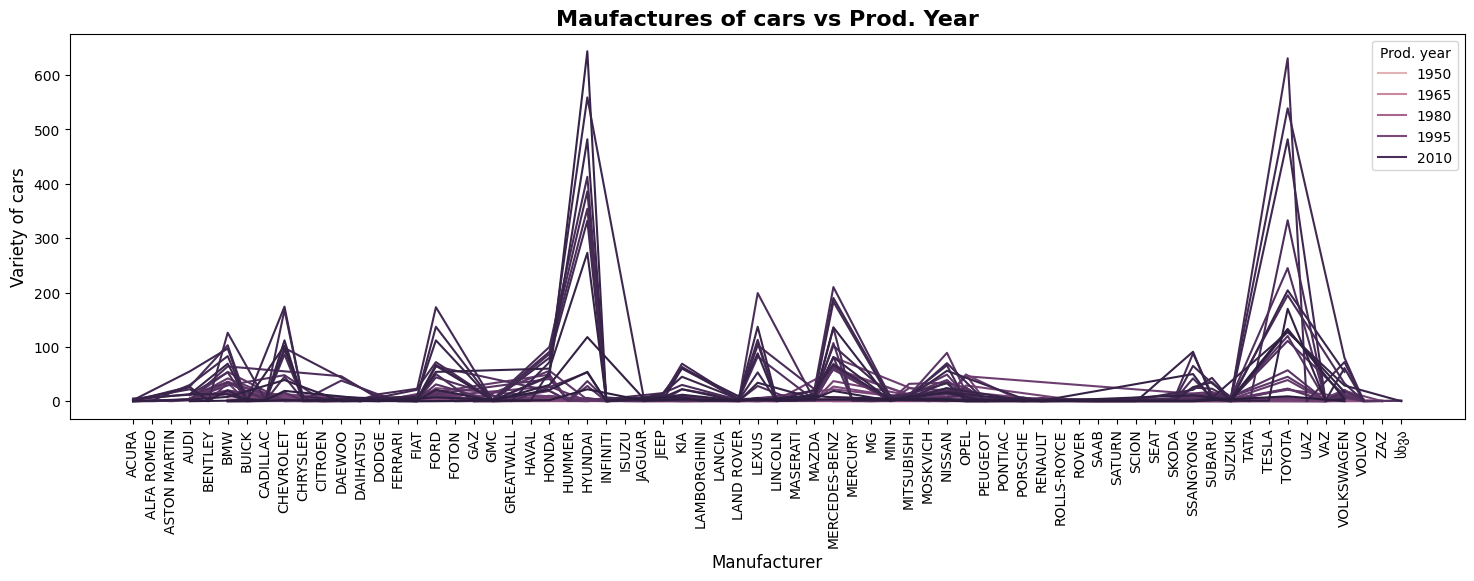

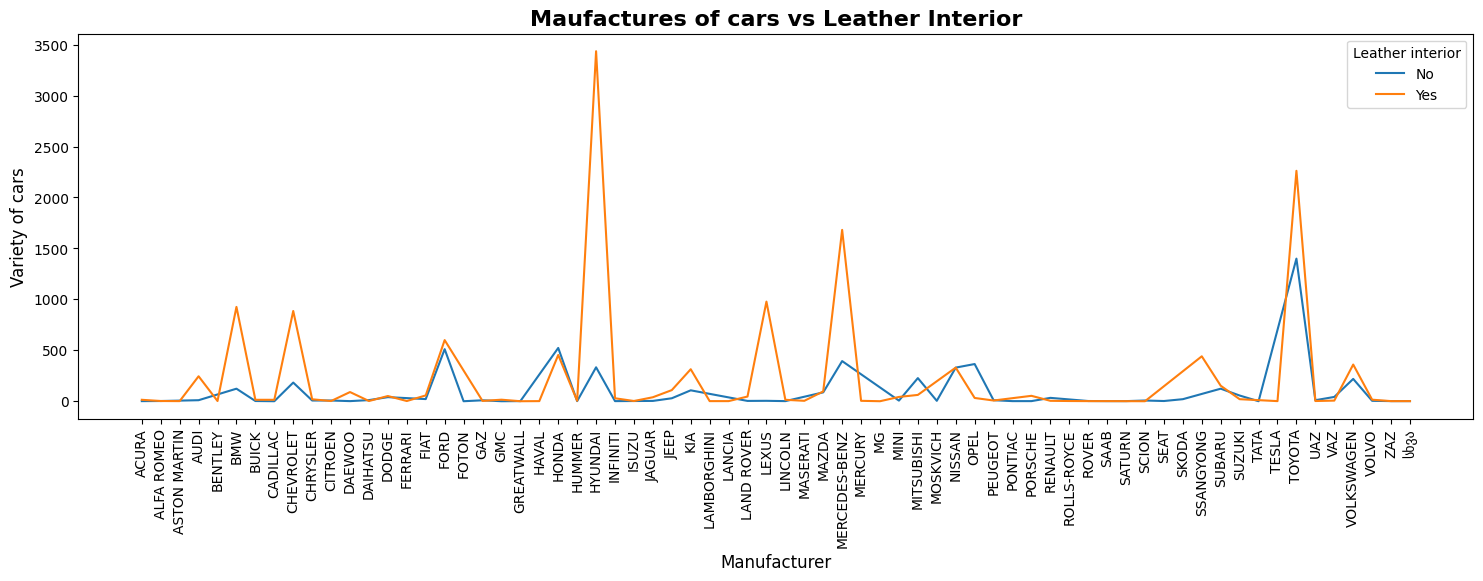

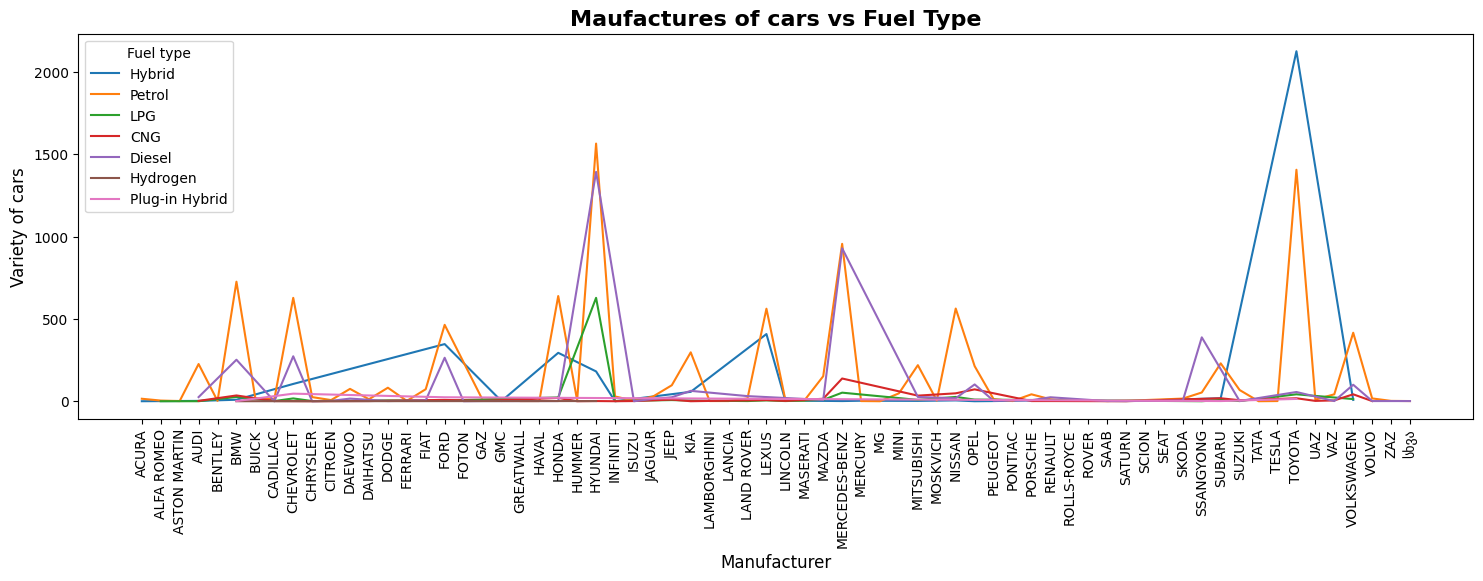

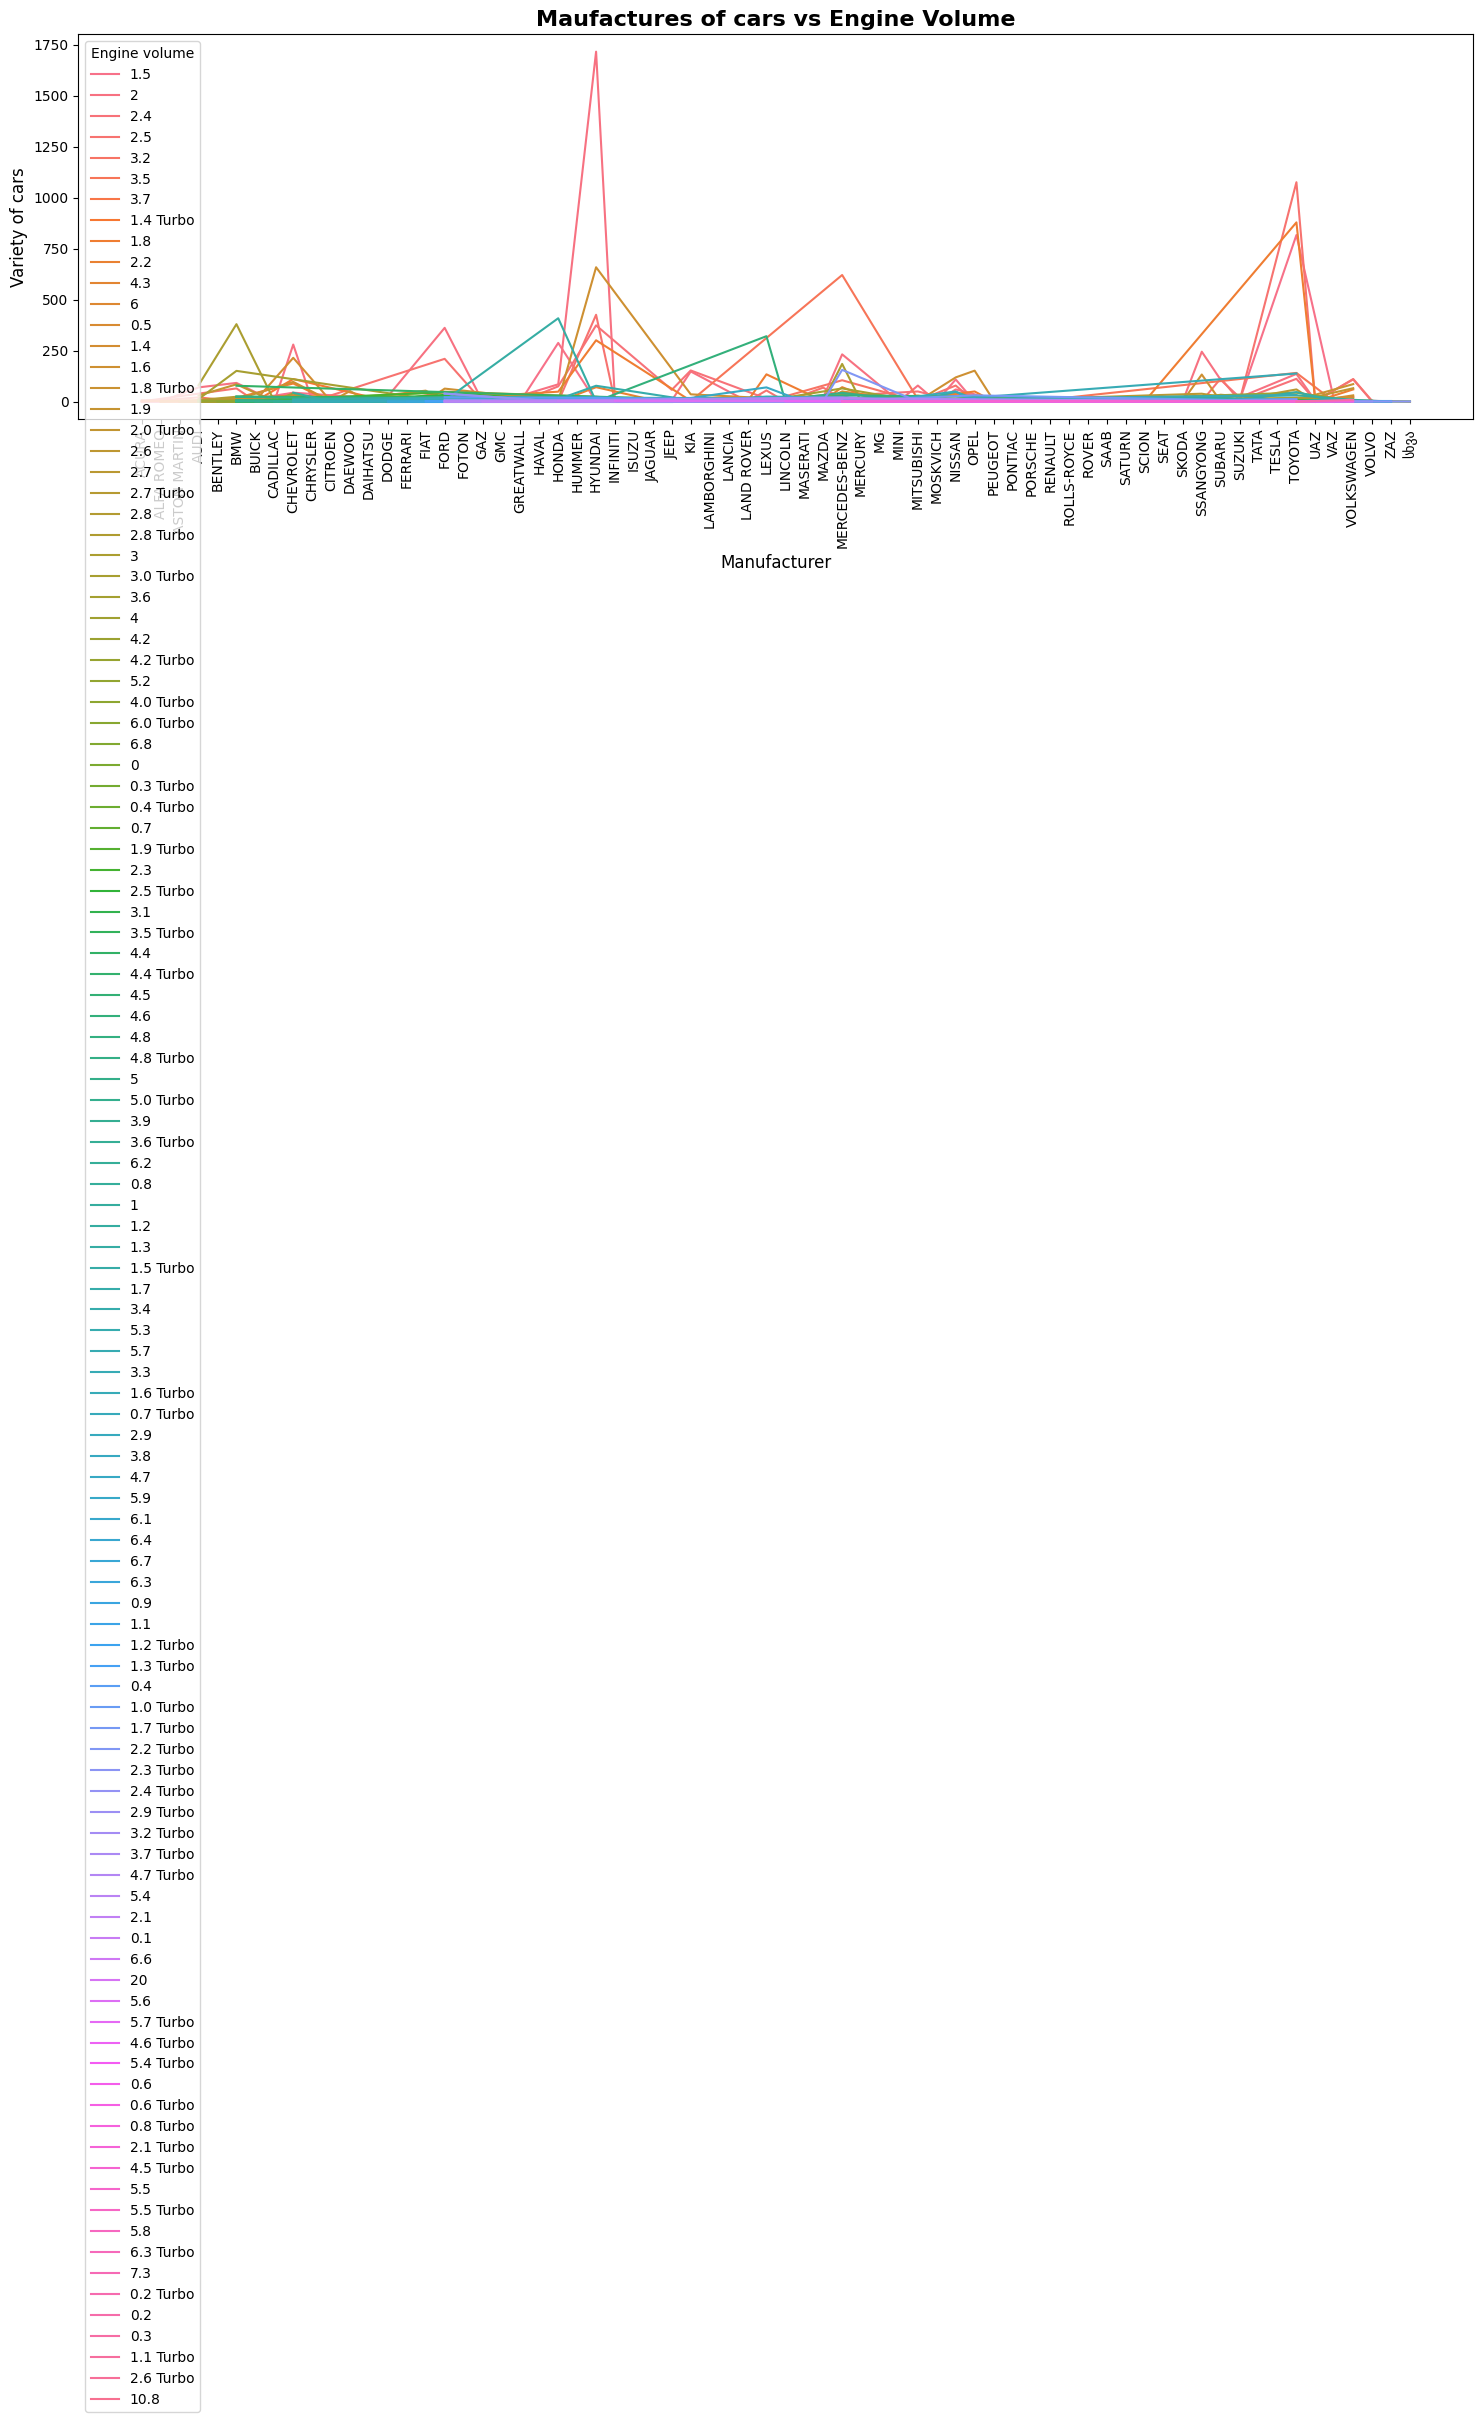

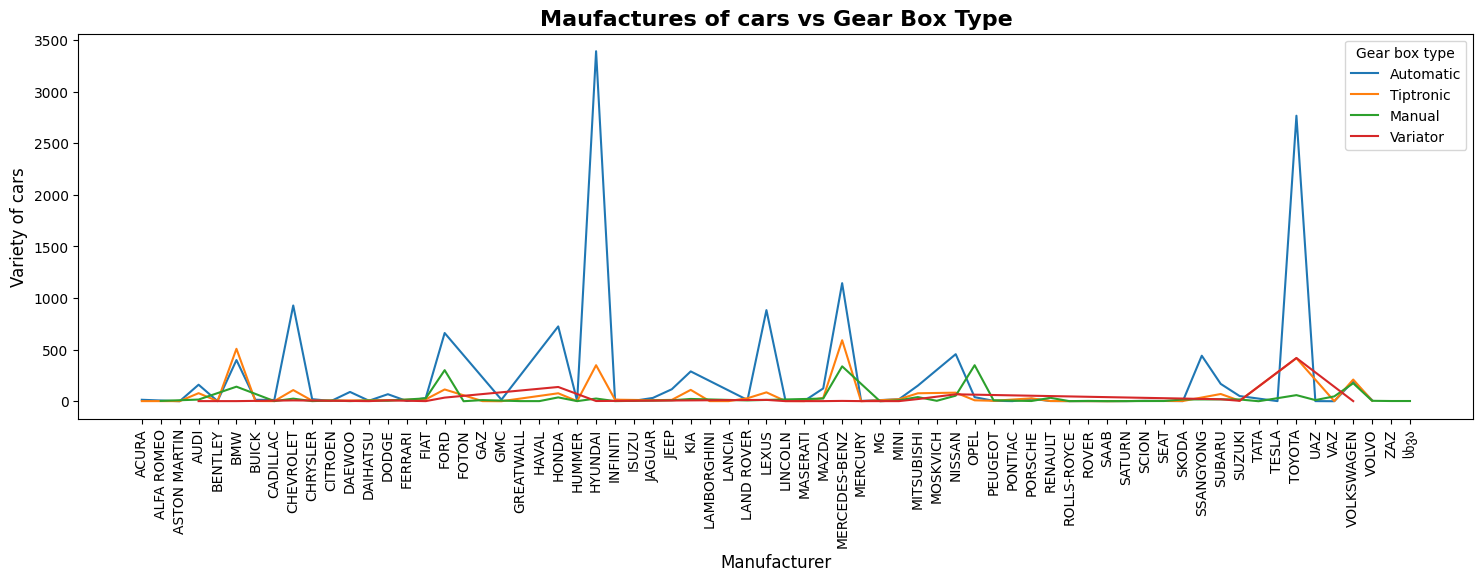

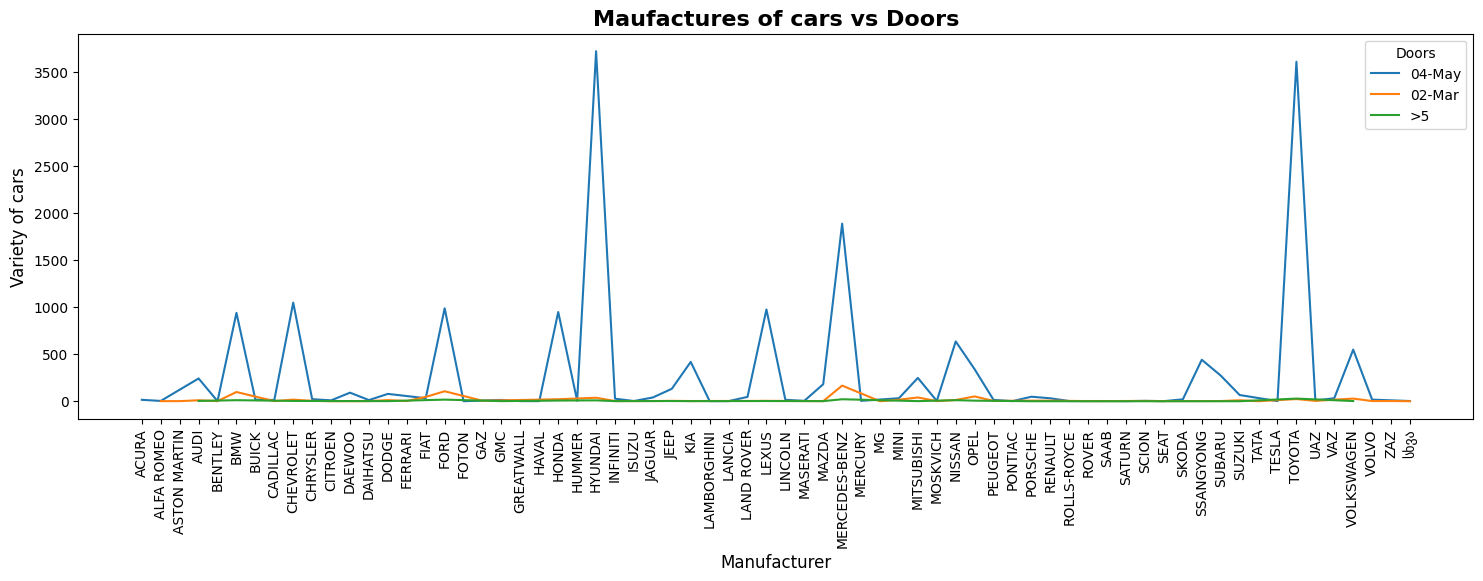

In [36]:

cat_col  = ['Prod. year', 'Leather interior', 'Fuel type','Engine volume','Gear box type', 'Doors']
for hue in cat_col:
    plt.figure(figsize=(18,5))
    df1 = train[['Manufacturer',hue, 'Price']].groupby(by= ['Manufacturer',hue], as_index=True).count().reset_index()
    plot = sns.lineplot(x = 'Manufacturer', y = 'Price',  data = df1, hue = hue)
    plt.title(f'Maufactures of cars vs {hue.title()}', fontsize=16,weight='bold')
    plt.xlabel('Manufacturer', fontsize=12)
    plt.ylabel('Variety of cars', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

**Data Preprocessing**

In [37]:
train.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,2.748200e+04,1.923700e+04,27482.000000,27482.000000,27482.000000
mean,4.557857e+07,1.855593e+04,2010.912452,4.593734,6.563569
std,9.244972e+05,1.905813e+05,5.632865,1.413918,4.329256
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569808e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577207e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580197e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,127.000000,16.000000


In [38]:
#Droping Columns in data which are of no use in prediction
train=train.drop(['ID','Color'],axis=1)
train.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,12
1,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,8
2,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,2
3,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,0
4,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,4


In [39]:
df=train #let us store train in df and perform cleaning of data

# We see - values in Levy column lets replace it with Null values
df['Levy'].replace( {'-':np.nan}, inplace=True)

# Conveting data type object to float
df['Levy']=df['Levy'].astype('float')
# Droping rows with Null values
df.dropna(subset=['Levy'],inplace=True)

#Coverting Yes,NO in Leather interior Column to True and False
df['Leather interior'].replace( {'Yes':True, 'No':False}, inplace=True)

# Engine Volume Column contain Turbo int so we will slice it reove word Turbo and changing it in float type
df['Engine volume'] = df['Engine volume'].astype(str)
df['Engine volume'].str.lower()
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')

# Mileage Column contain km ,so we have to remove it as well and also change its datatype to int
df['Mileage']=df['Mileage'].astype(str)
df['Mileage'].str.lower()
df['Mileage']=df['Mileage'].str.strip('km')
df['Mileage']=df['Mileage'].astype('int64')

# Removing string part in Doors Column
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5},inplace=True)




**Label Encoding via Label Encoder:**

As of now we have cleaned most of our data one thing we are suppose to do is to covert all the columns which have catagorical data into meaning full numerical one thus it will be easy for our model to learn for this we will import label Encoder.

In [40]:
from sklearn.preprocessing import LabelEncoder
cols =['Manufacturer','Model','Category','Leather interior','Fuel type','Gear box type','Drive wheels','Doors','Wheel']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328.0,1399.0,27,777,2010,4,1,2,3.5,186005,6.0,0,0,1,0,12
1,16621.0,1018.0,6,382,2011,4,0,5,3.0,192000,6.0,2,0,1,0,8
3,3607.0,862.0,14,385,2011,4,1,2,2.5,168966,4.0,0,0,1,0,0
4,11726.0,446.0,18,404,2014,3,1,5,1.3,91901,4.0,0,1,1,0,4
5,39493.0,891.0,20,806,2016,4,1,1,2.0,160931,4.0,0,1,1,0,4


As we have Concatenated two data sets its time now to slice them as test data set contain null price values which it will make our model difficult to learn so we will use splited data set in end to predict 'Price' Column

In [41]:
test1=df[df['Price'].isna()] #Test data contain null price values
df=df[df['Price'].notna()] # Data set with price values which will be use for training

In [42]:
df.describe()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
count,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,1.341800e+04,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000,13418.000000
mean,17298.492175,906.838128,26.353779,523.454315,2013.138024,6.385005,0.855642,3.377180,2.317208,3.724392e+05,4.516619,0.296691,0.869802,0.986436,0.023327,6.894619
std,19370.756312,461.867051,13.742762,259.008990,3.050424,2.739042,0.351466,1.765446,0.872821,2.044857e+07,1.122808,0.739029,0.497107,0.135827,0.150945,4.465039
min,1.000000,87.000000,0.000000,0.000000,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3607.000000,640.000000,20.000000,331.000000,2011.000000,4.000000,1.000000,2.000000,1.800000,6.800000e+04,4.000000,0.000000,1.000000,1.000000,0.000000,4.000000
50%,13500.000000,781.000000,20.000000,506.000000,2013.000000,7.000000,1.000000,5.000000,2.000000,1.183655e+05,4.000000,0.000000,1.000000,1.000000,0.000000,4.000000
75%,23436.000000,1058.000000,42.000000,775.000000,2015.000000,9.000000,1.000000,5.000000,2.500000,1.792000e+05,4.000000,0.000000,1.000000,1.000000,0.000000,12.000000
max,872946.000000,11714.000000,49.000000,983.000000,2020.000000,10.000000,1.000000,6.000000,20.000000,2.147484e+09,16.000000,3.000000,2.000000,2.000000,1.000000,16.000000


**Finding Outliers**

By looking at data it can be noted that there is good amount of difference between max values and 75% values of many labels its mean our data contain outliers which should be removed before we get into training model.For this we will use IQR(The interquartile range)to detect outliers and then we will drop those rows

In [43]:
def detect_outliers(df,features,thold=1.5):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their index
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indexes
        outlier_indices.extend(outlier_list_col)
        return outlier_indices
features = ['Price', 'Levy', 'Mileage']
outliers = detect_outliers(df,features, 1.5)
deleted_df = df.drop(df.loc[outliers].index,axis=0) # Dropping outliers
train=deleted_df
X=train.drop(['Price'],axis=1)
y=train['Price']

**Model Training**

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Assuming 'X' contains the features and 'y' contains the target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=661)

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)


# Decision Tree Regression
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)

# XGBRBOOST
from xgboost import XGBRegressor
xg = XGBRegressor(objective ='reg:linear',max_depth=8,n_estimators = 100,random_state=1)
xg.fit(X_train, y_train)
y_pred_xgb = xg.predict(X_test)
joblib.dump(xg, 'Saved_Model.pkl')

#Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=200, random_state=123)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for All models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Print the metrics for All models
print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_linear)
print("R-squared (R2):", r2_linear)

print("\nDecision Tree Regression:")
print("Mean Squared Error (MSE):", mse_tree)
print("R-squared (R2):", r2_tree)

print("\nXGBR Regression:")
print("Mean Squared Error (MSE):", mse_xgb)
print("R-squared (R2):", r2_xgb)

print("\nRandom Forest:")
print("Mean Squared Error (MSE):", mse_forest)
print("R-squared (R2):", r2_forest)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:00:25] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Linear Regression:
Mean Squared Error (MSE): 129286090.12523009
R-squared (R2): 0.23956799113330318

Decision Tree Regression:
Mean Squared Error (MSE): 51813632.98924749
R-squared (R2): 0.6952437421339714

XGBR Regression:
Mean Squared Error (MSE): 31626878.43252418
R-squared (R2): 0.8139777397759373

Random Forest:
Mean Squared Error (MSE): 32392286.654364277
R-squared (R2): 0.8094757789604067


**Model Optimization/Hyperparameter Tuning**

In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xg = XGBRegressor(objective='reg:linear')
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'n_estimators': [100, 150, 200, 260],
    'random_state': [1, 142, 123, 789]

}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:03:12] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Best parameters: {'max_depth': 8, 'n_estimators': 100, 'random_state': 1}


**Prediction**

In [46]:
# LOADING SAVED MODEL
loaded_model = joblib.load('Saved_Model.pkl')

X = test1.drop('Price', axis=1)
# Use the trained model to predict the target variable
Predicted = loaded_model.predict(X)
# Print the predicted prices
for i in range(len(Predicted)):
    print("Predicted Price {}:{}".format(i+1,Predicted[i]))

Streaming output truncated to the last 5000 lines.
Predicted Price 792:15814.1162109375
Predicted Price 793:26749.181640625
Predicted Price 794:19142.72265625
Predicted Price 795:9705.953125
Predicted Price 796:15317.2763671875
Predicted Price 797:9763.7880859375
Predicted Price 798:29880.3046875
Predicted Price 799:2372.53662109375
Predicted Price 800:5265.39501953125
Predicted Price 801:14797.2451171875
Predicted Price 802:856.0361328125
Predicted Price 803:10908.1201171875
Predicted Price 804:19608.751953125
Predicted Price 805:13237.1123046875
Predicted Price 806:19375.984375
Predicted Price 807:36868.9453125
Predicted Price 808:17998.0390625
Predicted Price 809:43186.48828125
Predicted Price 810:13518.5498046875
Predicted Price 811:35154.2109375
Predicted Price 812:2489.548583984375
Predicted Price 813:16196.4814453125
Predicted Price 814:927.1409301757812
Predicted Price 815:18855.8984375
Predicted Price 816:2235.9033203125
Predicted Price 817:47843.171875
Predicted Price 818:135